<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_3_INAM/blob/main/Copia_de_Students_INAM_03_kernel_methods_SVM_part_a_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambient Intelligence: Kernel methods and Support Vector Machine

In this lab session we are going to see:



1.   Introduction to kernel methods and RBF Networks.
2.   Support Vector Machine for classification.

![texto alternativo](https://drive.google.com/uc?id=1aQVi8Llx2UfLdhh5wtSXf7xpXR6lFlOW)



##Kernel methods
It is known that there can be data that in its original space its not linearly separable but by introducing the correct features (more variables) or transforming the original features (strategy followed by NN family of algorithms) it is possible that the data becomes linearly separable.
The idea behind Kernel methods is to be able to separate data that in its original space is not linear separable and make it linear separable through the use of a transformation that projects the data into a higher dimensional space, called the feature space, where the data becomes linearly separable.

To visaualize this idea, imagine that we have the following data set:


In [ ]:
import numpy as np
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
seed = 223344

In [ ]:
# For functions
def plot_circles(x,y, title="Plot of the data"):
  reds = y == 0
  blues = y == 1
  if x.shape[-1] == 2:
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    plt.title(title)
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=30, edgecolors="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=30, edgecolors="k")
  else:    
    ax = plt.figure(figsize=(10,8)).gca(projection='3d')
    ax.scatter(x[reds, 0], x[reds, 1], x[reds, 2], c="red", s=30, edgecolors="k")
    ax.scatter(x[blues, 0], x[blues, 1], x[blues, 2], c="blue", s=30, edgecolors="k")
    ax.view_init(elev=30, azim=-110)
    ax.set_zlabel("$x_3$")
  ax.set_xlabel("$x_1$")
  ax.set_ylabel("$x_2$")
  plt.show()
  plt.close()

def projection_2d_to_3d(data):
  new_x1 = np.square(data[:,0])
  new_x2 = np.sqrt(2)*data[:,0]*data[:,1]
  new_x3 = np.square(data[:,1])
  transformed_data = np.array([new_x1, new_x2, new_x3]).T
  return transformed_data

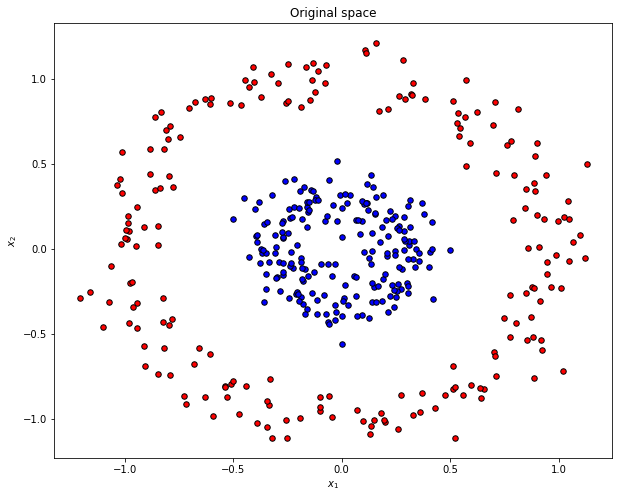

In [ ]:
np.random.seed(0)
x, y = make_circles(n_samples=400, shuffle=True, noise=0.1, random_state=None, 
                    factor=0.3)
plot_circles(x,y, "Original space")

#### Exercise
**Is the data linearly separable?**

Claramente el conjunto de datos no puede separarse utilizando una recta en dos dimensiones.

**Is a single perceptron able to separate such data?**

Como se ha estudiado en el curso, un único perceptrón es capaz de encontrar la recta óptima que separa un conjunto de datos. Por lo tanto, no sería capaz de separar dicho conjunto de datos puesto que no es linealmente separable.

**Which classifier (of the ones presented in block 2) would you use in order to classify data from this dataset?**

Con un MLP de dimensión adecuada podría resolverse el problema fácilmente.

We are going to project the data to a new (and higher) dimensional space in order to make it linearly separable.

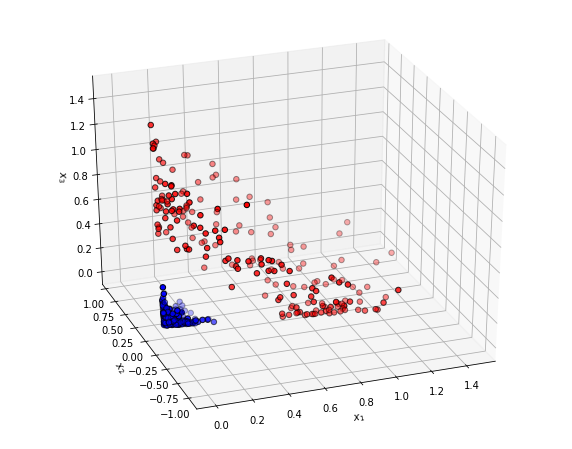

In [ ]:
new_x = projection_2d_to_3d(x)
plot_circles(new_x, y, "Feature space")

The fact of projecting data into higher dimensions in order to convert it to linearly separable is a very powerful tool. So powerful that some methods like the Support Vector Machine exploits this feature in order to find the hyperplane in a very high dimensional space, even in an (theoretically) infinite one, where the data becomes linearly separable.

BUT first we need to be familiar with the family of functions that permit to project the data into higher spaces, the most famous of them is the family of radial basis functions.

Radial basis functions (RBF) are real-valued functions whose value depends on the distance between the input and some fixed point. Any function that satisfies the property $\varphi(\textbf{x})=\varphi(\textbf{||x||})$ is a RBF.

There exists a lot of radial basis functions, but the most popular and used one is the Gaussian function, which normally has the form:
$\varphi(\textbf{x})=\exp(-\frac{||\textbf{x}-\textbf{c}||^2}{r^2})$

and as a kernel function it has the form:

$K(\textbf{x},\textbf{x'})=\exp(-\frac{||\textbf{x}-\textbf{x'}||^2}{2\sigma^2})$

RBF functions are used to form RBF Networks, an special case of Neural Networks that instead of using hyperplanes in order to separate the classes, it uses the properties of the RBF in order to group points in classes.

## RBF Networks
![texto alternativo](https://drive.google.com/uc?id=191-gm721u1IfD1o-ls38O6c4t6F0p5Nc)

The main idea of RBF NN is to propose prototype points of our data set and use RBF functions in order to compute the distance between the data and the prototypes, so the prototypes through the RBF functions act as interpolation of our data, then the interpolations are weighted and summed up in order to obtain the output of the model. Because the equation is a linear combination on the weights, it is possible to compute their values through the same procedure used for linear regression. The prototypes can be found through the use of the KMeans algorithm (old friend from Notebook 1).

**Why the presented RBF function is also known as the RBF Gaussian?**

*Hint: Compare the formula with the univariate Guassian distribution one.*

La expresión de la distribución gausiana es:
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DIIuXF5QRBTY&psig=AOvVaw01SWQLysVQpZYbQKDzeSfs&ust=1652774466947000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCKC1zevG4_cCFQAAAAAdAAAAABAD

Como puede observarse, la función RBF y la distribución gausiana tienen mucha similitud. En el caso de la función RBF se elimina el primer término de estandarización, ya que lo que queremos es comparar vectores. No es necesario esalarlos entre 0 y 1.

**Why do you think that it is said that RBF functions are used to interpolate the data?**

Como se explica en los apuntes, las RBF networks se usan para clasificar conjuntos de datos usando unos puntos prototipo. Para ello, se asocia una campana de Gauss a cada prototipo y se pondera cada dato de su alrededor en función de la distancia a que se encuetre. Al fin y al cabo, en esto consiste una interpolación de datos.

In [ ]:
np.random.seed(223344)

def distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2, axis=-1))

def rbf_function(x,c,r):
  d = distance(x,c)
  gamma = 1/((r)**2)
  return np.exp(-gamma*d**2)

def rbf_function_2(x, c, centroids, num_classes):
  d = distance(x,c)
  centroids_distances = np.array([distance(c,centroids) for c in centroids])
  max_index = np.argmax(centroids_distances)
  max_distance = max(centroids_distances[max_index])
  gamma = np.sqrt(2*num_classes) / max_distance
  return np.exp(-gamma*d**2)


def one_hot_encoder(y, num_classes):
  k_hot_encoding = np.zeros((len(y), num_classes))
  for k in range(num_classes):
    k_hot_encoding[np.where(y==k)[0],k] = 1
  return k_hot_encoding

def kmeans(x, k, n_iter=100, fixed_init_centroids=True):
  init_centroids_pos = np.random.randint(len(x),size=k)
  centroids = x[range(k)] if fixed_init_centroids else x[init_centroids_pos]
  clusters_std = np.zeros((len(centroids),1))
  last_centroids = np.zeros(centroids.shape)
  r = np.zeros(k)
  cluster_assigned = np.zeros((len(x),1))
  for n in range(n_iter):
    # Expectation step: Distances to the centroids
    for i in range(len(x)):
      for c_index, c in enumerate(centroids):
        r[c_index] = distance(x[i], c)
      cluster_assigned[i] = np.argmin(r)
    # Maximization step: new centroids as cluster means
    for c_index in range(k):
      centroids[c_index] = x[(np.where(cluster_assigned == c_index))[0]].mean(axis=0)
      clusters_std[c_index] = x[(np.where(cluster_assigned == c_index))[0]].std()
    if (last_centroids == centroids).all():
      break
    else:
      last_centroids = centroids.copy()
  return cluster_assigned, centroids, clusters_std

We will use the K-Means algorithm with two goals in mind:


1.   Find prototypes candidates.
2.   Use the standard deviation of the clusters as the radius for our function. Remember that **s** is an hyperparameter and we can use any value.

In the next code snippet feel free to play with different values for the standard deviation and for the centroid and understand what the RBF does.



In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = c
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = 1
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.5371035683105653
Radius: [0.38095669]
RBF value: 0.7494016108599689

Distance: 1.4558748569889053
Radius: [0.4613593]
RBF value: 0.12008306117174956

Distance: 1.1418754385298213
Radius: [0.51659923]
RBF value: 0.27147654951897565



#### Exercise
**Try the following values for new_c and new_s and explain what happens based on the RBF output**

Case 1:
```
new_c = c
new_s = s
```

Case 1:
```
new_c = x[0]
new_s = s
```

Case 2:
```
new_c = 0
new_s = s
```

Case 3:
```
new_c = c
new_s = 1
```

Case 4:
```
new_c = c
new_s = 0.1
```

Case 5:
```
new_c = c
new_s = 10
```

In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = c
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = s
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.5371035683105653
Radius: [0.38095669]
RBF value: [0.13700139]

Distance: 1.4558748569889053
Radius: [0.4613593]
RBF value: [4.73501542e-05]

Distance: 1.1418754385298213
Radius: [0.51659923]
RBF value: [0.00755357]



In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = x[0]
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = s
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.0
Radius: [0.38095669]
RBF value: [1.]

Distance: 0.0
Radius: [0.4613593]
RBF value: [1.]

Distance: 0.0
Radius: [0.51659923]
RBF value: [1.]



In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = 0
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = s
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.9691433208901564
Radius: [0.38095669]
RBF value: [0.00154645]

Distance: 0.9691433208901564
Radius: [0.4613593]
RBF value: [0.01212326]

Distance: 0.9691433208901564
Radius: [0.51659923]
RBF value: [0.02961723]



In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = c
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = 0.1
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.5371035683105653
Radius: [0.38095669]
RBF value: 2.9611624171073747e-13

Distance: 1.4558748569889053
Radius: [0.4613593]
RBF value: 8.875136603615672e-93

Distance: 1.1418754385298213
Radius: [0.51659923]
RBF value: 2.3617398899044457e-57



In [ ]:
_, centroids, clusters_std= kmeans(x,3, fixed_init_centroids=True)
rbf_distances = [rbf_function(x[0],c,s) for c, s in zip(centroids,clusters_std)]
for c, s in zip(centroids,clusters_std):
  new_c = c
  dist = distance(x[0],new_c)
  print(f"Distance: {dist}")
  print(f"Radius: {s}")
  new_s = 10
  rbf_output = rbf_function(x[0],new_c,new_s)
  print(f"RBF value: {rbf_output}\n")

Distance: 0.5371035683105653
Radius: [0.38095669]
RBF value: 0.9971193546132355

Distance: 1.4558748569889053
Radius: [0.4613593]
RBF value: 0.9790273345114467

Distance: 1.1418754385298213
Radius: [0.51659923]
RBF value: 0.9870458416651071



Al variar los prototipos y sus radios de comparación, obtenemos distintos resultados de la función RBF. La función RBF debe computarse para cada prototipo, por lo tanto, no tiene sentido que dicha función se calcule usando un único prototipo, como sucede en el segundo caso.
Tampoco tiene sentido que la distancia "s", se actualize con el valor de la última distancia calcualda, pues "s", define la zona en que se clasifica un vector como parecido o como distinto. Si variamos esta zona a cada iteración, no se obtiene un resultado concluyente.

**What is the effect of increasing s? Why?**

Si aumentamos el radio del prototipo, clasificaremos un mayor número de vectores como cercanos al prototipo, en cambio, si el radio es muy pequeño, sólo los vectores más cercanos al prototipo se clasificarán como parecidos.

Finally, we can train our RBF Network model. Now that we have the RBF distances all that is left is to compute the coefficients with the normal equations from linear regression:

$\theta = (X^T*X)^{-1}*X^T*Y$

The dependent variable y will be one-hot-encoded, transforming it into a vector in which the position with a 1 indicates the class.

In [ ]:
num_classes = 2
labels, centroids, clusters_std= kmeans(x,num_classes, fixed_init_centroids=True)
rbf_distances = None
Y = one_hot_encoder(y, num_classes)
new_s = s #np.repeat(0.01, num_classes)
for obs in x:
  rbf_distance = np.array([rbf_function(obs,c,s) for c, s in zip(centroids,new_s)]).T
  rbf_distances = rbf_distance if rbf_distances is None else np.vstack((rbf_distances, rbf_distance))

w = np.linalg.pinv(rbf_distances.T @ rbf_distances) @ rbf_distances.T @ Y

print(f"The coefficients of our model are: {w}")
preds = rbf_distances @ w
print(f"Accuracy of the RBF Network: {sum(np.argmax(preds, axis=1)==y)/len(y)}")


The coefficients of our model are: [[0.24669838 1.52169045]]
Accuracy of the RBF Network: 0.5


In [ ]:
num_classes = 2
labels, centroids, clusters_std= kmeans(x,num_classes, fixed_init_centroids=True)
rbf_distances = None
Y = one_hot_encoder(y, num_classes)
new_s = np.repeat(0.04, num_classes)
for obs in x:
  rbf_distance = np.array([rbf_function(obs,c,s) for c, s in zip(centroids,new_s)]).T
  rbf_distances = rbf_distance if rbf_distances is None else np.vstack((rbf_distances, rbf_distance))

w = np.linalg.pinv(rbf_distances.T @ rbf_distances) @ rbf_distances.T @ Y

print(f"The coefficients of our model are: {w}")
preds = rbf_distances @ w
print(f"Accuracy of the RBF Network: {sum(np.argmax(preds, axis=1)==y)/len(y)}")

The coefficients of our model are: [[7.82433156e-45 1.54196346e+00]
 [1.62559596e-48 2.20517888e+00]]
Accuracy of the RBF Network: 0.5225


Our RBF Network using as radius the standard deviation has an accuracy of 50% because it is classifiying all observations to the same class. The reason could be due to the radius hyperparameter. Try new values for the radius by changing new_s by np.repeat("new_value",num_classes).


```
new_s = np.repeat(0.01, num_classes)
```

#### Exercise
**Try values for the hyperparameter radius between 0.01 and 0.04. Explain why they accuracy increases/decreases.**

*Hint: Use the numpy function arange and a for bucle*

Como se ha comentado anteriormente, variar el radio del prototipo influye en el momento de clasificar los puntos de alrededor en cercanos o lejanos. No hay un radio general que se pueda aplicar, en cada conjunto de datos , según como este distribuido, la clasificación deberá hacerse en función de radios más grandes o más pequeños.
Con r= 0.01 se obtiene un 68.75% de precisión
Con r= 0.02 se obtiene un 93.75% de precisión
Con r= 0.03 se obtiene un 71.75% de precisión
Con r= 0.04 se obtiene un 52.25% de precisión

**Is there any problem in achieve an accuracy of 100% through tunning the radius?**

Ya se sabe que conseguir una precisión del modelo del 100% es un problema, ya que no se está dando al modelo la capacidad de generalizar, se sobredimensiona el modelo para que este sea capaz de clasificar a la perfeción el conjunto de datos proporcionado. Pero cuando aparece un nuevo dato, fuera de las fronteras de decisión del modelo (pero dentro de las clasificaciones), el modelo es incapaz de generalizar y clasificar el nuevo dato correctamente.
